In [88]:
import pandas as pd 
import numpy as np 
import os
import math 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [89]:
path = "."
fname = os.path.join(path, "raw_data.csv")
df = pd.read_csv(fname)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [91]:
columns=['company','title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag','gender',
       'Race', 'Education', 'rowNumber']

In [92]:
df = df[columns]

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  62637 non-null  object 
 1   title                    62642 non-null  object 
 2   totalyearlycompensation  62642 non-null  int64  
 3   location                 62642 non-null  object 
 4   yearsofexperience        62642 non-null  float64
 5   yearsatcompany           62642 non-null  float64
 6   tag                      61788 non-null  object 
 7   gender                   43102 non-null  object 
 8   Race                     22427 non-null  object 
 9   Education                30370 non-null  object 
 10  rowNumber                62642 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [94]:
df.title.unique()

array(['Product Manager', 'Software Engineer',
       'Software Engineering Manager', 'Data Scientist',
       'Solution Architect', 'Technical Program Manager',
       'Human Resources', 'Product Designer', 'Marketing',
       'Business Analyst', 'Hardware Engineer', 'Sales', 'Recruiter',
       'Mechanical Engineer', 'Management Consultant'], dtype=object)

In [95]:
df.groupby('title').count()

,company,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,gender,Race,Education,rowNumber
title,,,,,,,,,,
Business Analyst,885,885,885,885,885,882,527,460,521,885
Data Scientist,2578,2578,2578,2578,2578,2573,1740,895,1410,2578
Hardware Engineer,2200,2200,2200,2200,2200,2197,1527,816,1282,2200
Human Resources,364,364,364,364,364,361,207,181,199,364
Management Consultant,976,976,976,976,976,973,620,458,601,976
Marketing,710,710,710,710,710,708,423,376,423,710
Mechanical Engineer,490,490,490,490,490,488,304,260,320,490
Product Designer,1516,1516,1516,1516,1516,1513,1143,636,781,1516
Product Manager,4673,4673,4673,4673,4673,4550,3063,1505,2197,4673


In [96]:
df.groupby('location').count().sort_values(by=['title'], ascending = False)

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,tag,gender,Race,Education,rowNumber
location,,,,,,,,,,
"Seattle, WA",8701,8701,8701,8701,8701,8470,5800,2603,3676,8701
"San Francisco, CA",6797,6797,6797,6797,6797,6671,4319,1846,2682,6797
"New York, NY",4562,4562,4562,4562,4562,4525,3102,1657,2167,4562
"Redmond, WA",2649,2649,2649,2649,2649,2571,1838,780,1105,2649
"Mountain View, CA",2275,2275,2275,2275,2275,2233,1488,678,974,2275
...,...,...,...,...,...,...,...,...,...,...
"Glen Allen, VA",1,1,1,1,1,1,1,0,1,1
"Gliwice, SL, Poland",1,1,1,1,1,1,1,1,0,1
"Goa, GA, India",1,1,1,1,1,1,1,1,1,1


In [97]:
df.groupby('yearsatcompany').count()

,company,title,totalyearlycompensation,location,yearsofexperience,tag,gender,Race,Education,rowNumber
yearsatcompany,,,,,,,,,,
0.00,15915,15916,15916,15916,15916,15747,11057,6018,8139,15916
0.10,14,14,14,14,14,12,11,0,0,14
0.20,10,10,10,10,10,10,7,0,2,10
0.25,27,27,27,27,27,26,19,0,1,27
0.30,15,15,15,15,15,15,13,0,4,15
...,...,...,...,...,...,...,...,...,...,...
32.00,1,1,1,1,1,1,1,0,0,1
33.00,2,2,2,2,2,2,1,0,0,2
34.00,2,2,2,2,2,2,1,0,1,2


In [98]:
current_tag_list = ['iOS', 'Android', 'Mobile (iOS + Android)', 'Web Development (Front-End)', 'ML / AI', 'Distributed Systems (Back-End)', 'API Development (Back-End)', 'Full Stack',
'Networking', 'Testing (SDET)', 'Data', 'Production', 'Security', 'DevOps', 'Site Reliability (SRE)', 'Blockchain', 'Other']

In [99]:
mapping_dict = {'Analytics': "Data", 
                'Operations': "DevOps",
                'Embedded Systems': "Full Stack",
                'Validation': "Testing (SDET)",
                'Verification': "Testing (SDET)",
                'Analog': "Testing (SDET)", 
                'User Experience (UX)': "Web Development (Front-End)", 
                'Infrastructure': "Distributed Systems (Back-End)", 
                'Sales': "Other",
                'Hardware': "Full Stack",
                'Growth': "Other",
                'ASIC Design': "Web Development (Front-End)",
                'Enterprise': "Other",
                'Product': "Distributed Systems (Back-End)",
                'Technical': "DevOps",
                'SoC Design': "Web Development (Front-End)", 
                'Design': "Web Development (Front-End)",
                'Consumer': "Other",
                'General': "Other",
                'Cloud': "DevOps",
                'Embedded' : "Full Stack", 
                'Analytic': "Data"}

In [100]:
df['tag_clean'] = df['tag'].map(mapping_dict)
df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,gender,Race,Education,rowNumber,tag_clean
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,NaN,NaN,NaN,1,NaN
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,NaN,NaN,NaN,2,NaN
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,NaN,NaN,NaN,3,NaN
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,NaN,NaN,NaN,7,NaN
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,NaN,NaN,NaN,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),NaN,NaN,NaN,1973,NaN
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,NaN,NaN,NaN,2037,NaN
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,NaN,NaN,NaN,2044,NaN
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,NaN,NaN,NaN,2097,NaN


In [101]:
df[df.tag_clean.isin(current_tag_list)]

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,gender,Race,Education,rowNumber,tag_clean
411,Qualcomm,Software Engineer,240000,"Santa Clara, CA",15.0,6.0,Embedded Systems,Male,NaN,NaN,797,Full Stack
536,Oracle,Product Manager,375000,"Seattle, WA",5.0,1.0,Cloud,Male,NaN,NaN,1003,DevOps
550,Google,Software Engineer,284000,"Sunnyvale, CA",3.0,3.0,Infrastructure,Male,NaN,NaN,1029,Distributed Systems (Back-End)
605,Microsoft,Software Engineer,162000,"Redmond, WA",4.0,4.0,Embedded,Male,NaN,NaN,1140,Full Stack
612,Nvidia,Software Engineer,210000,"Santa Clara, CA",8.0,2.5,Embedded,Male,NaN,NaN,1153,Full Stack
...,...,...,...,...,...,...,...,...,...,...,...,...
62300,Microsoft,Software Engineering Manager,408000,"Mountain View, CA",10.0,5.0,Hardware,NaN,NaN,NaN,1774,Full Stack
62514,Microsoft,Solution Architect,160000,"Detroit, MI",18.0,4.0,Cloud,Male,NaN,NaN,826,DevOps
62559,Microsoft,Software Engineer,188000,"Hilbert, WI",8.0,1.0,Cloud,Male,NaN,NaN,1048,DevOps
62592,Amazon,Software Engineer,255000,"Seattle, WA",6.0,6.0,Embedded,Male,NaN,NaN,1172,Full Stack


In [102]:
df['tag_clean_2'] = np.nan
df['tag_clean_2'] = df.tag_clean_2.fillna(df.tag_clean).fillna(df.tag)

In [103]:
df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,gender,Race,Education,rowNumber,tag_clean,tag_clean_2
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,NaN,NaN,NaN,1,NaN,NaN
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,NaN,NaN,NaN,2,NaN,NaN
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,NaN,NaN,NaN,3,NaN,NaN
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,NaN,NaN,NaN,7,NaN,NaN
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,NaN,NaN,NaN,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),NaN,NaN,NaN,1973,NaN,Distributed Systems (Back-End)
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,NaN,NaN,NaN,2037,NaN,Full Stack
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,NaN,NaN,NaN,2044,NaN,Full Stack
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,NaN,NaN,NaN,2097,NaN,iOS


In [104]:
t = df.groupby('tag_clean_2').count().sort_values(by=['title'], ascending = False).rename(columns={'company':'count_'})
t

,count_,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,gender,Race,Education,rowNumber,tag_clean
tag_clean_2,,,,,,,,,,,,
Distributed Systems (Back-End),12746,12747,12747,12747,12747,12747,12747,8693,4382,6176,12747,1909
Full Stack,11919,11920,11920,11920,11920,11920,11920,8429,4015,5430,11920,538
API Development (Back-End),6276,6277,6277,6277,6277,6277,6277,4476,2171,2953,6277,0
Web Development (Front-End),4228,4229,4229,4229,4229,4229,4229,3073,1771,2130,4229,1258
ML / AI,4204,4204,4204,4204,4204,4204,4204,2805,1018,1930,4204,0
...,...,...,...,...,...,...,...,...,...,...,...,...
HW Verification,1,1,1,1,1,1,1,1,0,0,1,0
HW designer,1,1,1,1,1,1,1,1,0,1,1,0
HW development,1,1,1,1,1,1,1,0,0,1,1,0


In [105]:
t = t.loc[t.count_>100]#.sum()

In [106]:
len(t.index)

16

In [107]:
df.loc[df.tag_clean_2.isin(t.index)]

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,gender,Race,Education,rowNumber,tag_clean,tag_clean_2
409,Yahoo,Software Engineer,160500,"Sunnyvale, CA",0.58,0.58,Full Stack,Male,NaN,NaN,791,NaN,Full Stack
410,Oracle,Software Engineering Manager,340000,"Redwood City, CA",16.00,15.00,Distributed Systems (Back-End),Male,NaN,NaN,794,NaN,Distributed Systems (Back-End)
411,Qualcomm,Software Engineer,240000,"Santa Clara, CA",15.00,6.00,Embedded Systems,Male,NaN,NaN,797,Full Stack,Full Stack
412,Splunk,Software Engineer,160000,"Seattle, WA",5.00,3.00,Full Stack,Male,NaN,NaN,798,NaN,Full Stack
413,Google,Software Engineer,208000,"Mountain View, CA",0.00,0.00,Distributed Systems (Back-End),Male,NaN,NaN,805,NaN,Distributed Systems (Back-End)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.00,1.00,Distributed Systems (Back-End),NaN,NaN,NaN,1973,NaN,Distributed Systems (Back-End)
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.00,2.00,Full Stack,NaN,NaN,NaN,2037,NaN,Full Stack
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.00,12.00,Full Stack,NaN,NaN,NaN,2044,NaN,Full Stack
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.00,4.00,iOS,NaN,NaN,NaN,2097,NaN,iOS


In [108]:
df.drop(columns = ['tag','tag_clean'], inplace = True)

In [109]:
df = df.loc[df.tag_clean_2.isin(t.index)]

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53860 entries, 409 to 62641
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  53856 non-null  object 
 1   title                    53860 non-null  object 
 2   totalyearlycompensation  53860 non-null  int64  
 3   location                 53860 non-null  object 
 4   yearsofexperience        53860 non-null  float64
 5   yearsatcompany           53860 non-null  float64
 6   gender                   37295 non-null  object 
 7   Race                     19373 non-null  object 
 8   Education                26128 non-null  object 
 9   rowNumber                53860 non-null  int64  
 10  tag_clean_2              53860 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.9+ MB


In [111]:
#kNN imputation for Education

In [112]:
df.groupby('totalyearlycompensation').count().index#.sort_values(by=['company'], ascending = False)

Int64Index([  10000,   11000,   12000,   13000,   14000,   15000,   16000,
              17000,   18000,   19000,
            ...
            1900000, 1950000, 2000000, 2200000, 2372000, 2500000, 4490000,
            4500000, 4950000, 4980000],
           dtype='int64', name='totalyearlycompensation', length=863)

In [113]:
def group_data(x):
    val = abs(x)
    if x <= 50000: return "a. <50k"
    elif x<= 100000: return "b. 50-100k"
    elif x<= 150000: return "c. 100-150k"
    elif x<=200000: return "d. 150-200k"
    elif x<=250000: return "e. 200-250k"
    elif x<=300000: return "f. 250-300k"
    elif x<=350000: return "g. 300-350k"
    elif x<=400000: return "h. 350-400k"
    elif x<=450000: return "i. 400-450k"
    elif x<=500000: return "j. 450-500k"
    elif x<=1000000: return "k. 500k-1m"
    else: return "l. >1m"
    
df['salarygroup'] = df['totalyearlycompensation'].apply(group_data)

<ipython-input-113-c5be54595bf1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salarygroup'] = df['totalyearlycompensation'].apply(group_data)


In [114]:
df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,gender,Race,Education,rowNumber,tag_clean_2,salarygroup
409,Yahoo,Software Engineer,160500,"Sunnyvale, CA",0.58,0.58,Male,NaN,NaN,791,Full Stack,d. 150-200k
410,Oracle,Software Engineering Manager,340000,"Redwood City, CA",16.00,15.00,Male,NaN,NaN,794,Distributed Systems (Back-End),g. 300-350k
411,Qualcomm,Software Engineer,240000,"Santa Clara, CA",15.00,6.00,Male,NaN,NaN,797,Full Stack,e. 200-250k
412,Splunk,Software Engineer,160000,"Seattle, WA",5.00,3.00,Male,NaN,NaN,798,Full Stack,d. 150-200k
413,Google,Software Engineer,208000,"Mountain View, CA",0.00,0.00,Male,NaN,NaN,805,Distributed Systems (Back-End),e. 200-250k
...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.00,1.00,NaN,NaN,NaN,1973,Distributed Systems (Back-End),g. 300-350k
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.00,2.00,NaN,NaN,NaN,2037,Full Stack,e. 200-250k
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.00,12.00,NaN,NaN,NaN,2044,Full Stack,e. 200-250k
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.00,4.00,NaN,NaN,NaN,2097,iOS,f. 250-300k


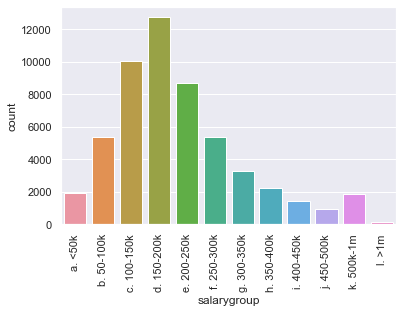

In [115]:
t = df.groupby(['salarygroup']).count().rename(columns={'company':'count'}).reset_index()#data clean up 
ax = sns.barplot(x="salarygroup", y="count", data=t)
ax.tick_params(axis='x', rotation=90)

In [116]:
s = df[['salarygroup','gender', 'title']].dropna()
s.rename(columns = {'title':'count'}, inplace = True)
p = ['Male','Female','Other']
s = s[s.gender.isin(p)]

In [117]:
s = s.groupby(['salarygroup','gender']).count().rename({'title':'count_'})#.reset_index()#.groupby('salarygroup').sum()

In [118]:
s['gender'] = s.index.get_level_values(1)
s.droplevel(level=-1)
s = s.unstack()['count']


In [119]:
s["sum"] = s.sum(axis=1)
s['F_ratio'] = 100*(s['Female']/s['sum'])
s['M_ratio'] = 100*(s['Male']/s['sum'])
s['O_ratio'] = 100*(s['Other']/s['sum'])
s = s.fillna(0)
s = s[['F_ratio', 'M_ratio', 'O_ratio']]
df = df.copy()
s

gender,F_ratio,M_ratio,O_ratio
salarygroup,,,
a. <50k,9.296320,90.187218,0.516462
b. 50-100k,14.410256,84.948718,0.641026
c. 100-150k,17.764722,81.270108,0.965170
d. 150-200k,18.155523,80.976749,0.867727
e. 200-250k,15.791251,83.347408,0.861341
f. 250-300k,13.638874,85.588073,0.773054
g. 300-350k,12.411515,86.314299,1.274186
h. 350-400k,11.142454,87.658674,1.198872
i. 400-450k,10.549944,87.991021,1.459035


In [120]:
df = df.iloc[np.random.permutation(len(df))]

In [121]:
df['imputed_gender'] = None 


def impute_gender(mapping_df, data):
    
    #for each salary range 
    for salary_range in mapping_df.index:
        #print(salary_range)
        f_ratio, m_ratio, o_ratio = mapping_df.loc[salary_range, :]
        #print(f_ratio, m_ratio, o_ratio)
        #print(len)
        f_index = round(len(data.loc[data.salarygroup == salary_range])*(f_ratio/100))
        m_index = f_index + round(len(data.loc[data.salarygroup == salary_range])*(m_ratio/100))
        o_index = m_index + round(len(data.loc[data.salarygroup == salary_range])*(o_ratio/100))
        #print(f_index, m_index, o_index)
        count = 0 
        for i, row in data.loc[data.salarygroup == salary_range].iterrows():                       
           # print(row)
            if count <= f_index:
                data.at[i, 'imputed_gender'] = 'Female'
            elif count < m_index:
                data.at[i, 'imputed_gender'] = 'Male'
            else:
                data.at[i, 'imputed_gender'] = 'Other'
            count += 1
            
    return data


new_df = impute_gender(s, df.loc[df.gender.isna()][['salarygroup', 'imputed_gender']])     
new_df.head() 

,salarygroup,imputed_gender
56899,b. 50-100k,Female
42693,b. 50-100k,Female
1613,f. 250-300k,Female
29544,d. 150-200k,Female
48684,d. 150-200k,Female


In [122]:
df = pd.merge(df, new_df[['imputed_gender']], how = 'left', left_index=True, right_index=True).drop(columns = ['imputed_gender_x'])

In [123]:
df['gender_2'] = None 
df['gender_2'] = df.gender_2.fillna(df.imputed_gender_y).fillna(df.gender)
df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,gender,Race,Education,rowNumber,tag_clean_2,salarygroup,imputed_gender_y,gender_2
29602,Audible,Recruiter,130000,"Newark, NJ",5.0,2.0,Female,Asian,Master's Degree,40705,DevOps,c. 100-150k,NaN,Female
36678,Oracle,Product Manager,97000,"Seattle, WA",5.0,4.0,Male,White,Master's Degree,50440,Distributed Systems (Back-End),b. 50-100k,NaN,Male
56899,General Motors,Software Engineer,98000,"Chandler, AZ",5.0,5.0,NaN,NaN,Bachelor's Degree,77143,Full Stack,b. 50-100k,Female,Female
60947,Zulily,Software Engineer,219000,"Seattle, WA",6.0,1.0,Male,White,NaN,82609,iOS,e. 200-250k,NaN,Male
22046,Bird,Data Scientist,165000,"Santa Monica, CA",4.0,2.0,Male,NaN,PhD,30102,Full Stack,d. 150-200k,NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46129,Northwestern Mutual,Software Engineer,129000,"Milwaukee, WI",10.0,1.0,NaN,NaN,NaN,62962,Full Stack,c. 100-150k,Other,Other
44746,PwC,Software Engineer,10000,"Bengaluru, KA, India",0.0,0.0,Male,Asian,Bachelor's Degree,61200,Web Development (Front-End),a. <50k,NaN,Male
32751,Facebook,Recruiter,208000,"Menlo Park, CA",12.0,2.0,NaN,NaN,NaN,45150,Distributed Systems (Back-End),e. 200-250k,Other,Other
30066,Microsoft,Software Engineer,63000,"Hyderabad, TS, India",7.0,0.0,Male,Asian,Master's Degree,41360,Distributed Systems (Back-End),b. 50-100k,NaN,Male


In [124]:
df = df.drop(columns = ['imputed_gender_y', 'gender'])
df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,Race,Education,rowNumber,tag_clean_2,salarygroup,gender_2
29602,Audible,Recruiter,130000,"Newark, NJ",5.0,2.0,Asian,Master's Degree,40705,DevOps,c. 100-150k,Female
36678,Oracle,Product Manager,97000,"Seattle, WA",5.0,4.0,White,Master's Degree,50440,Distributed Systems (Back-End),b. 50-100k,Male
56899,General Motors,Software Engineer,98000,"Chandler, AZ",5.0,5.0,NaN,Bachelor's Degree,77143,Full Stack,b. 50-100k,Female
60947,Zulily,Software Engineer,219000,"Seattle, WA",6.0,1.0,White,NaN,82609,iOS,e. 200-250k,Male
22046,Bird,Data Scientist,165000,"Santa Monica, CA",4.0,2.0,NaN,PhD,30102,Full Stack,d. 150-200k,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
46129,Northwestern Mutual,Software Engineer,129000,"Milwaukee, WI",10.0,1.0,NaN,NaN,62962,Full Stack,c. 100-150k,Other
44746,PwC,Software Engineer,10000,"Bengaluru, KA, India",0.0,0.0,Asian,Bachelor's Degree,61200,Web Development (Front-End),a. <50k,Male
32751,Facebook,Recruiter,208000,"Menlo Park, CA",12.0,2.0,NaN,NaN,45150,Distributed Systems (Back-End),e. 200-250k,Other
30066,Microsoft,Software Engineer,63000,"Hyderabad, TS, India",7.0,0.0,Asian,Master's Degree,41360,Distributed Systems (Back-End),b. 50-100k,Male


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53860 entries, 29602 to 5141
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  53856 non-null  object 
 1   title                    53860 non-null  object 
 2   totalyearlycompensation  53860 non-null  int64  
 3   location                 53860 non-null  object 
 4   yearsofexperience        53860 non-null  float64
 5   yearsatcompany           53860 non-null  float64
 6   Race                     19373 non-null  object 
 7   Education                26128 non-null  object 
 8   rowNumber                53860 non-null  int64  
 9   tag_clean_2              53860 non-null  object 
 10  salarygroup              53860 non-null  object 
 11  gender_2                 53860 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 7.4+ MB


In [126]:
df.rename(columns = {'tag_clean_2': 'tag', 'gender_2': 'gender'}, inplace = True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53860 entries, 29602 to 5141
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  53856 non-null  object 
 1   title                    53860 non-null  object 
 2   totalyearlycompensation  53860 non-null  int64  
 3   location                 53860 non-null  object 
 4   yearsofexperience        53860 non-null  float64
 5   yearsatcompany           53860 non-null  float64
 6   Race                     19373 non-null  object 
 7   Education                26128 non-null  object 
 8   rowNumber                53860 non-null  int64  
 9   tag                      53860 non-null  object 
 10  salarygroup              53860 non-null  object 
 11  gender                   53860 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 7.4+ MB


In [128]:
df.to_csv('edu_classification.csv')